In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open("hw03_data_set_images.csv") as file1:
  images_matrix = np.loadtxt(file1, delimiter=",")

with open("hw03_data_set_labels.csv") as file2:
  labels_array = np.loadtxt(file2, delimiter=",")

length = len(labels_array)

training_size = 25;

label1_size = 0;
label2_size = 0;
label3_size = 0;
label4_size = 0;
label5_size = 0;

training_matrix = pd.DataFrame([])
testing_matrix = pd.DataFrame([])
labels_array_training = []
labels_array_testing = []

counter_training = 0
counter_testing = 0;

for i in range(length):
  if labels_array[i] == 1.0:
    if label1_size < training_size:
      training_matrix.insert(counter_training, "", images_matrix[i, :], True)
      labels_array_training.append(1.0)
      counter_training += 1
    else:
      testing_matrix.insert(counter_testing, "", images_matrix[i, :], True)
      labels_array_testing.append(1.0)
      counter_testing += 1
    label1_size += 1
  if labels_array[i] == 2.0:
    if label2_size < training_size:
      training_matrix.insert(counter_training, "", images_matrix[i, :], True)
      labels_array_training.append(2.0)
      counter_training += 1
    else:
      testing_matrix.insert(counter_testing, "", images_matrix[i, :], True)
      labels_array_testing.append(2.0)
      counter_testing += 1
    label2_size += 1
  if labels_array[i] == 3.0:
    if label3_size < training_size:
      training_matrix.insert(counter_training, "", images_matrix[i, :], True)
      labels_array_training.append(3.0)
      counter_training += 1
    else:
      testing_matrix.insert(counter_testing, "", images_matrix[i, :], True)
      labels_array_testing.append(3.0)
      counter_testing += 1
    label3_size += 1
  if labels_array[i] == 4.0:
    if label4_size < training_size:
      training_matrix.insert(counter_training, "", images_matrix[i, :], True)
      labels_array_training.append(4.0)
      counter_training += 1
    else:
      testing_matrix.insert(counter_testing, "", images_matrix[i, :], True)
      labels_array_testing.append(4.0)
      counter_testing += 1
    label4_size += 1
  if labels_array[i] == 5.0:
    if label5_size < training_size:
      training_matrix.insert(counter_training, "", images_matrix[i, :], True)
      labels_array_training.append(5.0)
      counter_training += 1
    else:
      testing_matrix.insert(counter_testing, "", images_matrix[i, :], True)
      labels_array_testing.append(5.0)
      counter_testing += 1
    label5_size += 1

training_matrix = training_matrix.T.to_numpy()
testing_matrix = testing_matrix.T.to_numpy()

#print(training_matrix)
#print(testing_matrix)
#print(len(training_matrix[:, 0]))
#print(len(testing_matrix[:, 0]))
#print(labels_array_training)
#print(labels_array_testing)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
# define training parameters
y_truth = np.array(labels_array_training).astype(int)
K = np.max(y_truth).astype(int)
N = len(training_matrix[:, 0])
Y_truth = np.zeros((N, K)).astype(int)                   
Y_truth[range(N), y_truth - 1] = 1

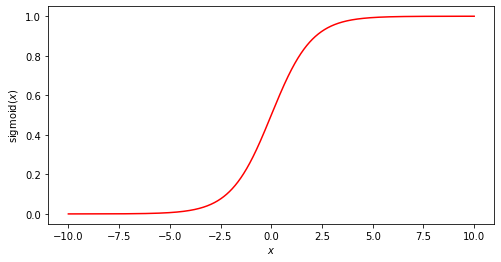

In [ ]:
#sigmoid function
def  sigmoid(X, w, w0):
  return (1 / (1 + np.exp(-(np.matmul(X, w) + w0))))
draw_seq = np.linspace(-10, +10, 2001)
plt.figure(figsize = (8, 4))
plt.plot(draw_seq, 1 / (1 + np.exp(-draw_seq)), "r-")
plt.xlabel("$x$")
plt.ylabel("sigmoid($x$)")
plt.show()

In [ ]:
#gradient function returns for w 
def gradient_w(X, Y_truth, Y_predicted):
  sub = Y_truth - Y_predicted
  first = np.multiply(sub, Y_predicted)
  third = 1 - Y_predicted
  second = np.multiply(first, third)
  second = second.transpose()
  final = np.matmul(second, training_matrix).transpose()
  final = final * -1
  return final

In [ ]:
#gradient function returns for w0
def gradient_w0(X, Y_truth, Y_predicted):
  sub = Y_truth - Y_predicted
  first = np.multiply(sub, Y_predicted)
  third = 1 - Y_predicted
  second = np.multiply(first, third)
  second = second.transpose()
  sum = np.asarray([np.sum(second[:, c] for c in range(K))])
  sum = sum * -1
  return sum


In [ ]:
#set learning parameters
eta = 0.001
epsilon = 0.001

In [ ]:
#randomly initialize w and w0
np.random.seed(421)
w = np.random.uniform(low = -0.01, high = 0.01, size = (training_matrix.shape[1], 5))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1,5))

In [ ]:
# learn w and w0 using gradient descent
iteration = 1
objective_values = []

while True:
  Y_predicted = sigmoid(training_matrix, w, w0)
  error = 0.5*np.sum((Y_truth - Y_predicted)**2)
  objective_values = np.append(objective_values, error)
  W_old = w
  w0_old = w0
  w = w - eta * gradient_w(training_matrix, Y_truth, Y_predicted)
  w0 = w0 - eta * gradient_w0(training_matrix, Y_truth, Y_predicted)
  if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((w - W_old)**2)) < epsilon:
    break
  iteration = iteration + 1

#print(w)
#print(w0)
#print(Y_predicted)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


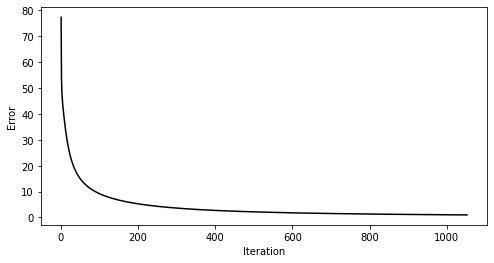

In [ ]:
# plot objective function during iterations
plt.figure(figsize = (8, 4))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [ ]:
# calculate confusion matrix for training data
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix_training = pd.crosstab(y_predicted, y_truth, rownames = ["y_pred"], colnames = ["y_truth"])
print(confusion_matrix_training)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   0   0   0
3         0   0  25   0   0
4         0   0   0  25   0
5         0   0   0   0  25


In [ ]:
y_truth_testing = np.array(labels_array_testing).astype(int)
N_test = len(testing_matrix[:, 0])
Y_truth_testing = np.zeros((N_test, K)).astype(int)                   
Y_truth_testing[range(N_test), y_truth_testing - 1] = 1

In [ ]:
# calculate confusion matrix for testing data
Y_predicted_test = sigmoid(testing_matrix, w, w0)
y_predicted_test = np.argmax(Y_predicted_test, axis = 1) + 1
confusion_matrix_testing = pd.crosstab(y_predicted_test, y_truth_testing, rownames = ["y_pred"], colnames = ["y_truth"])
print(confusion_matrix_testing)

y_truth   1   2   3   4   5
y_pred                     
1        13   1   0   0   0
2         1  11   0   0   1
3         0   0  14   0   0
4         0   0   0  14   0
5         0   2   0   0  13
